**VERIFICA A**

In [ ]:
%matplotlib inline
!pip install contextily
!pip install geopandas
import pandas as pd
import geopandas
import contextily as ctx
from shapely.geometry import Point
import xyzservices.providers as xyz
from google.colab import drive
drive.mount('/content/drive')

1. Visualizzare su una mappa i confini delle province lombarde e le autostrade. Le autostrade devono essere in grigio e i confini in nero.

In [ ]:
province = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g')
regioni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g')
autostrade = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/AutostradeLombardia/Autostrade_10000_CT10_line.zip')

In [ ]:
lombardia = regioni[regioni.DEN_REG == 'Lombardia']
lombardia

COD_RIP  ...                                           geometry
2        1  ...  MULTIPOLYGON (((485536.366 4985444.605, 485366...

[1 rows x 6 columns]

In [ ]:
provincelombardia = province[province.within(lombardia.geometry.squeeze())]
provincelombardia

COD_RIP  ...                                           geometry
11         1  ...  POLYGON ((483071.566 5104606.092, 483258.471 5...
12         1  ...  MULTIPOLYGON (((498077.207 5089780.202, 497614...
13         1  ...  POLYGON ((595652.358 5163515.659, 596042.420 5...
14         1  ...  MULTIPOLYGON (((538136.289 5004372.814, 539162...
15         1  ...  POLYGON ((585288.233 5104483.085, 585414.669 5...
16         1  ...  POLYGON ((615296.024 5132340.876, 615374.024 5...
17         1  ...  MULTIPOLYGON (((485536.366 4985444.605, 485366...
18         1  ...  POLYGON ((542189.537 5037362.585, 542408.347 5...
19         1  ...  POLYGON ((630538.958 5031669.589, 632819.864 5...
96         1  ...  POLYGON ((532079.618 5104664.092, 533286.608 5...
97         1  ...  POLYGON ((534551.968 5035118.603, 534818.280 5...
103        1  ...  POLYGON ((519754.706 5065242.380, 520199.702 5...

[12 rows x 13 columns]

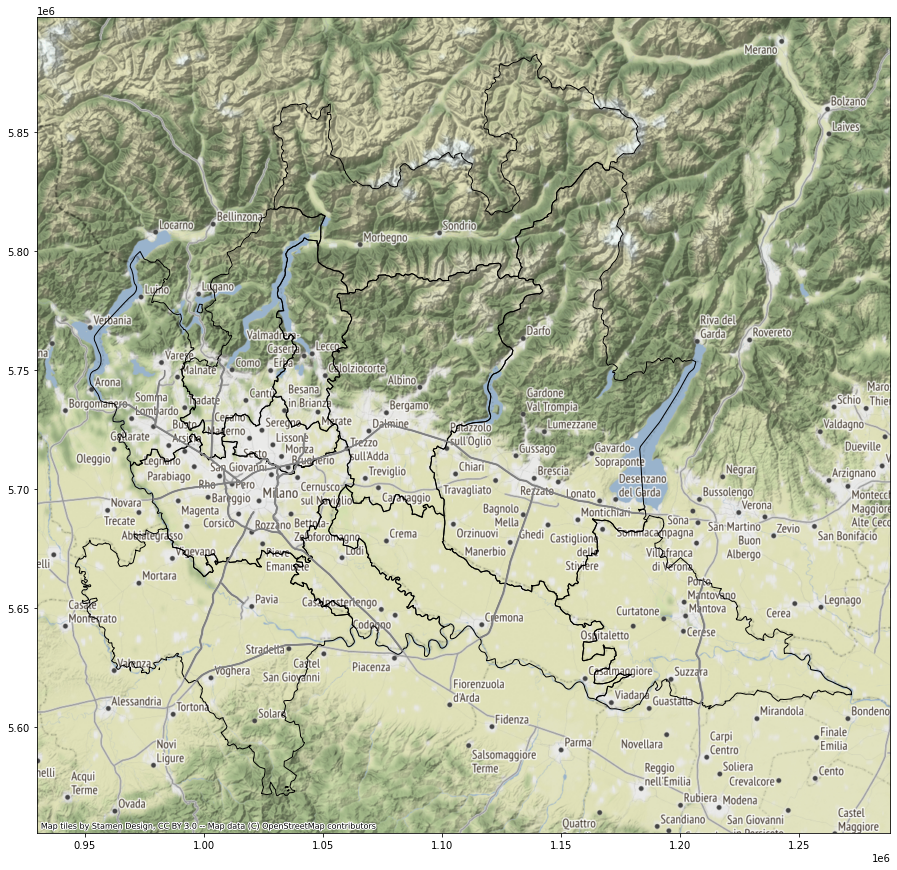

In [ ]:
ax = provincelombardia.to_crs(epsg=3857).plot(facecolor='none', edgecolor='k', figsize=(20,15))
autostrade.to_crs(epsg=3857).plot(ax=ax,facecolor='none', edgecolor='grey')
ctx.add_basemap(ax)

In [ ]:
autostrade

TS_EID  ...                                           geometry
0     19.0  ...  LINESTRING (496352.634 4981573.415, 496378.384...
1     18.0  ...  LINESTRING (580517.421 4994637.417, 580735.915...
2     21.0  ...  LINESTRING (580524.796 4994628.417, 580745.039...
3     65.0  ...  LINESTRING (521699.514 5024872.823, 521630.139...
4     62.0  ...  LINESTRING (504384.530 5044095.266, 504414.405...
5     90.0  ...  LINESTRING (519364.775 5030574.241, 519401.151...
6     78.0  ...  LINESTRING (519346.650 5030596.741, 519377.151...
7      7.0  ...  LINESTRING (519364.775 5030574.241, 519352.525...
8      8.0  ...  LINESTRING (519346.650 5030596.741, 519337.900...
9   1922.0  ...  LINESTRING (485557.854 5069342.204, 485588.231...
10   130.0  ...  LINESTRING (510188.551 5038184.696, 510192.926...
11   131.0  ...  LINESTRING (510188.551 5038184.696, 510186.301...
12   136.0  ...  LINESTRING (473152.912 5061873.298, 473252.162...
13   137.0  ...  LINESTRING (484526.009 5057918.338, 484520.884...
14   139.0  ...  LINESTRING (500884.722 5047505.292, 500903.352...
15   140.0  ...  LINESTRING (500870.596 5047376.792, 500867.222...
16  1915.0  ...  LINESTRING (509605.078 5040334.699, 509647.828...
17  1916.0  ...  LINESTRING (509605.078 5040334.699, 509629.203...
18  1917.0  ...  LINESTRING (596248.468 5039919.217, 596292.768...
19  1918.0  ...  LINESTRING (596332.966 5039880.716, 596384.466...
20    45.0  ...  LINESTRING (483693.626 5035220.147, 483734.501...
21    46.0  ...  LINESTRING (483695.626 5035199.648, 483732.375...
22    17.0  ...  LINESTRING (496361.009 4981571.915, 496395.134...
23   104.0  ...  LINESTRING (520374.739 5040918.650, 520381.740...
24   106.0  ...  LINESTRING (520336.615 5041012.149, 520323.115...
25   108.0  ...  LINESTRING (492935.511 4982476.902, 492950.261...
26   117.0  ...  LINESTRING (492950.136 4982450.903, 492978.386...
27  1921.0  ...  LINESTRING (503796.065 5010493.180, 503819.315...
28   162.0  ...  LINESTRING (510485.383 5004513.739, 510475.134...
29    23.0  ...  LINESTRING (646612.131 5012922.197, 646598.255...
30    24.0  ...  LINESTRING (646596.507 5012927.197, 646582.506...

[31 rows x 4 columns]

2. Visualizzare su una mappa le province attraversate da una certa autostrada inserita dall'utente. Controllare che l'autostrada sia effettivamente esistente: in caso contrario fornire un opportuno messaggio di errore. Colorare le province in verde, facendo in modo che la mappa al di sotto risulti visibile.

inserire autostrada: AUTOSTRADA TORINO-TRIESTE


/usr/local/lib/python3.7/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


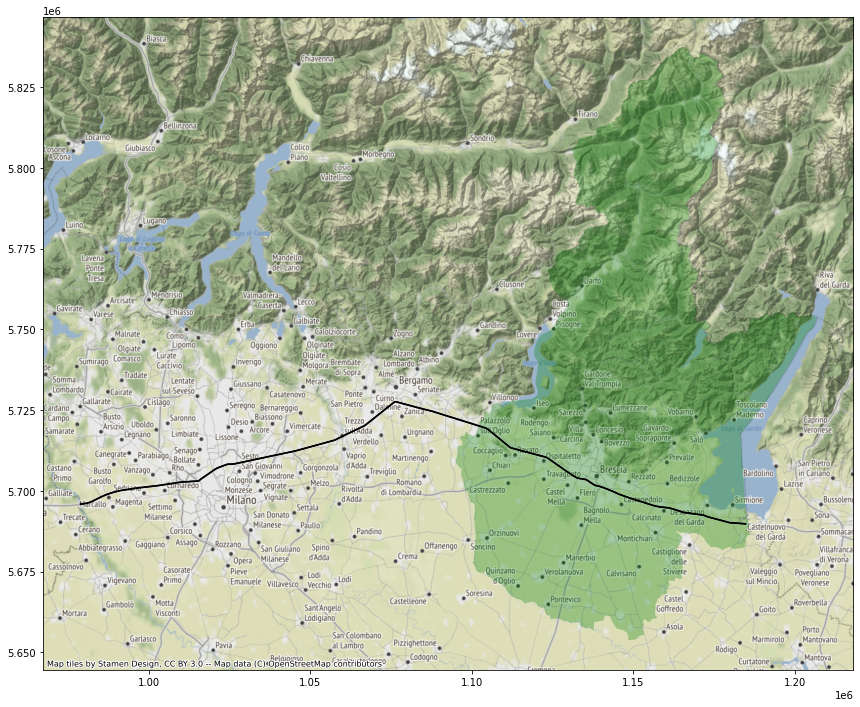

In [ ]:
user = input('inserire autostrada: ')
lst = list(autostrade['PERCORSO'])

if user not in lst:
  print('autostrada inesistente')
else: 
  autostrada = autostrade[autostrade.PERCORSO==user].to_crs(epsg=32632)
  prov = province[province.intersects(autostrada.geometry.squeeze())]
  ax = prov.to_crs(epsg=3857).plot(figsize=(20,12), facecolor='g', alpha=0.3)
  autostrada.to_crs(epsg=3857).plot(ax=ax, edgecolor='k')
  ctx.add_basemap(ax)

3. Visualizzare tutti i comuni che si trovano ad una certa distanza da un autostrada. L'utente inserisce il nome dell'autostrada e la distanza e il programma deve visualizzare una mappa con l'autostrada in nero e i comuni in rosso

In [ ]:
comuni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g')
comuni

COD_RIP  ...                                           geometry
0           1  ...  POLYGON ((404703.558 5026682.655, 405359.554 5...
1           1  ...  POLYGON ((380700.909 4977305.520, 381105.998 4...
2           1  ...  POLYGON ((364710.857 5022090.678, 364737.794 5...
3           1  ...  POLYGON ((415942.504 5033304.609, 416079.315 5...
4           1  ...  POLYGON ((376934.962 4999073.854, 376960.555 4...
...       ...  ...                                                ...
7898        5  ...  MULTIPOLYGON (((556602.772 4375162.650, 556598...
7899        5  ...  POLYGON ((541186.146 4375105.653, 541180.146 4...
7900        5  ...  MULTIPOLYGON (((546451.098 4325900.553, 546443...
7901        5  ...  POLYGON ((500362.475 4361229.767, 500397.474 4...
7902        5  ...  POLYGON ((494131.525 4353208.832, 494847.519 4...

[7903 rows x 13 columns]

inserisci la distanza: 50
Inserisci una autostrada: AUTOSTRADA MILANO - ROMA


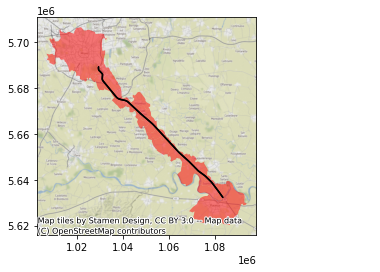

In [ ]:
dist = int(input("inserisci la distanza: "))
autostrada = input("Inserisci una autostrada: ")
autostrada1 = autostrade[autostrade.PERCORSO.str.contains(autostrada)]

ax = comuni[comuni.intersects(autostrada1.unary_union.buffer(dist))].to_crs(epsg=3857).plot(facecolor = "red", alpha = 0.5)
autostrada1.to_crs(epsg=3857).plot(ax=ax, edgecolor = "k")
ctx.add_basemap(ax)

4. Visualizzare su una mappa i parchi lombardi che non sono attraversati da nessun autostrada

In [ ]:
parchi = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Esercizio 6/Parchi_regionali_e_nazionali_polygon.zip')
parchi

FID  ...                                           geometry
0     5  ...  POLYGON ((587577.037 5107497.548, 587615.036 5...
1     6  ...  POLYGON ((586196.195 5100871.221, 586351.566 5...
2     7  ...  POLYGON ((486537.216 5078441.081, 486530.341 5...
3     8  ...  POLYGON ((617860.123 5053114.432, 617863.431 5...
4     1  ...  POLYGON ((584084.298 5161019.100, 583763.056 5...
5     2  ...  POLYGON ((611429.112 5154022.734, 612080.475 5...
6     3  ...  POLYGON ((584084.298 5161019.100, 584083.048 5...
7     4  ...  POLYGON ((617719.939 5125721.072, 617744.313 5...
8     9  ...  POLYGON ((533258.682 5067541.607, 533248.433 5...
9    15  ...  POLYGON ((476666.268 5067282.167, 476899.067 5...
10   11  ...  POLYGON ((503128.548 5073530.075, 503147.548 5...
11   10  ...  POLYGON ((530035.026 5077348.997, 530099.399 5...
12   20  ...  POLYGON ((566862.701 5044980.915, 566850.701 5...
13   16  ...  POLYGON ((551172.408 5063194.271, 551171.818 5...
14   17  ...  POLYGON ((530460.139 5059979.758, 530448.139 5...
15   12  ...  POLYGON ((519023.300 5071249.811, 519020.695 5...
16   13  ...  POLYGON ((508880.762 5069982.391, 508899.778 5...
17   14  ...  POLYGON ((492571.508 5069463.220, 492567.133 5...
18   19  ...  POLYGON ((507798.216 5051185.214, 507708.842 5...
19   18  ...  POLYGON ((557596.061 5048270.880, 557609.061 5...
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...
21   22  ...  POLYGON ((533691.079 5042919.602, 533758.703 5...
22   23  ...  POLYGON ((540167.544 5038793.618, 540195.043 5...
23   24  ...  POLYGON ((632059.361 5023580.221, 631992.362 5...
24   25  ...  POLYGON ((507743.475 5029863.193, 507763.882 5...
25   26  ...  POLYGON ((597132.825 5006159.060, 597136.825 5...

[26 rows x 11 columns]

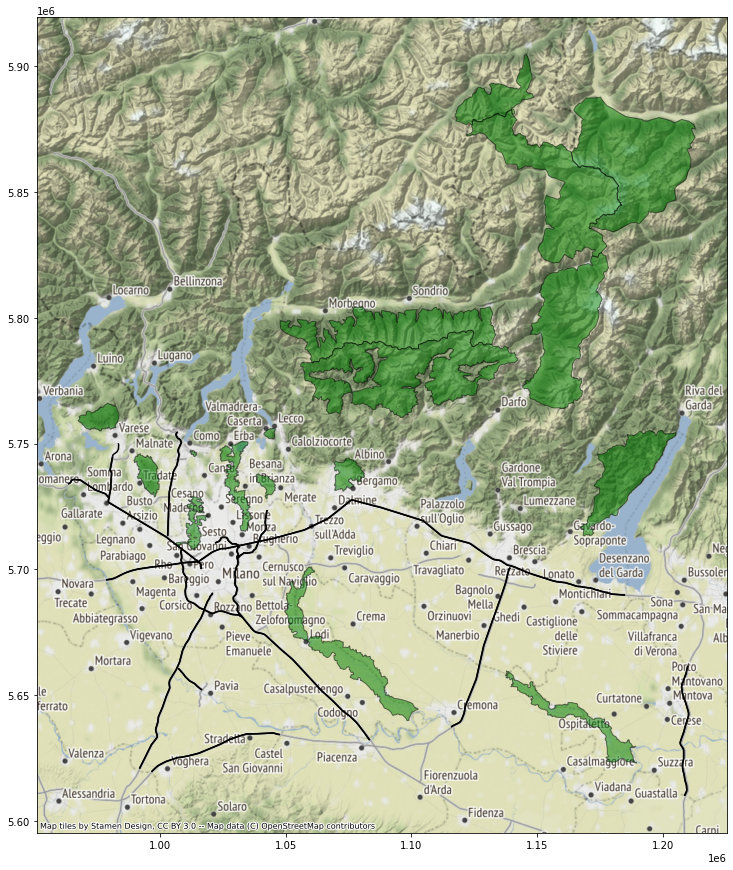

In [ ]:
parchiattr = parchi[parchi.intersects(autostrade.unary_union)]

copia_parchi = parchi

parchinonattr = copia_parchi.drop(parchiattr.index)

ax = parchinonattr.to_crs(epsg=3857).plot(facecolor = 'g', edgecolor='k', figsize=(20,15), alpha=0.5)
autostrade.to_crs(epsg=3857).plot(ax=ax, edgecolor='k')
ctx.add_basemap(ax)